In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import math

df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
iris_feat = df.iloc[:,:-1]
iris_species = df.iloc[:,-1]
iris_feat.head(11)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## SCATTER PLOTS

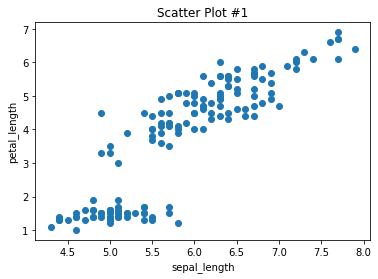

In [3]:
plt.scatter(x = iris_feat['sepal_length'],y = [iris_feat['petal_length']],alpha=1)
plt.title('Scatter Plot #1')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

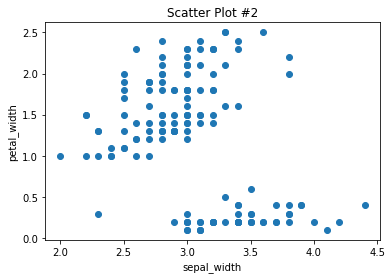

In [4]:
plt.scatter(x = iris_feat['sepal_width'],y = [iris_feat['petal_width']],alpha=1)
plt.title('Scatter Plot #2')
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

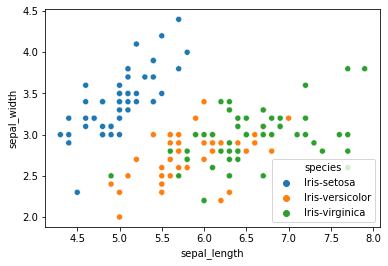

In [5]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

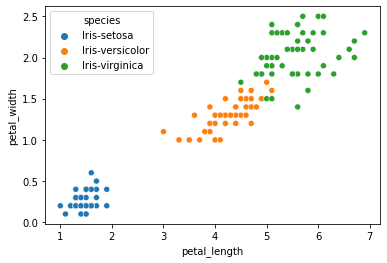

In [6]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)

## histograms


Text(0, 0.5, 'Frequency')

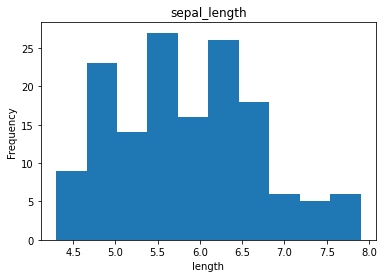

In [7]:
a,b = plt.subplots()
b.hist(iris_feat['sepal_length'])
b.set_title('sepal_length')
b.set_xlabel('length')
b.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

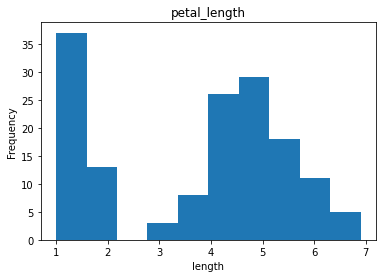

In [8]:
a,b = plt.subplots()
b.hist(iris_feat['petal_length'])
b.set_title('petal_length')
b.set_xlabel('length')
b.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

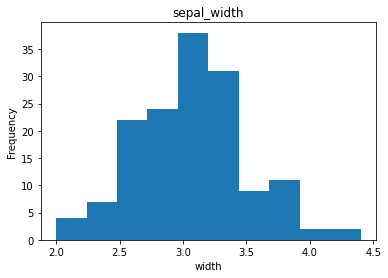

In [9]:
a,b = plt.subplots()
b.hist(iris_feat['sepal_width'])
b.set_title('sepal_width')
b.set_xlabel('width')
b.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

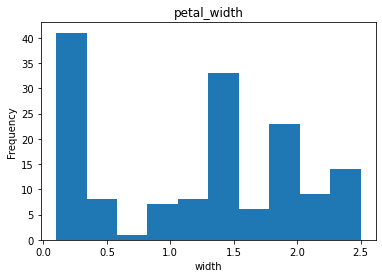

In [10]:
a,b = plt.subplots()
b.hist(iris_feat['petal_width'])
b.set_title('petal_width')
b.set_xlabel('width')
b.set_ylabel('Frequency')

## box plots

<AxesSubplot:>

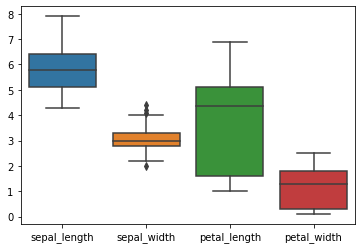

In [11]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

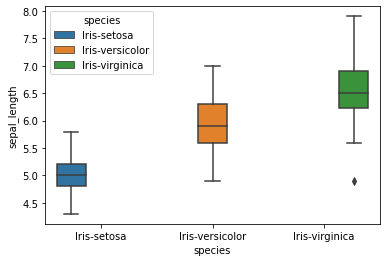

In [12]:
sns.boxplot(y=df['sepal_length'],x=df['species'],hue='species',data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

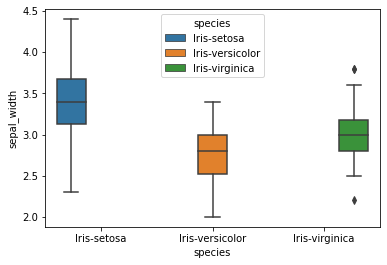

In [13]:
sns.boxplot(y=df['sepal_width'],x=df['species'],hue='species',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

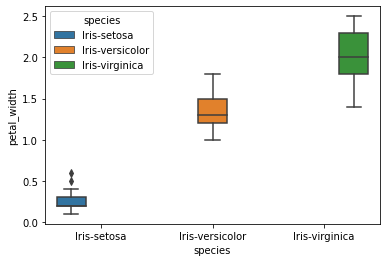

In [14]:
sns.boxplot(y=df['petal_width'],x=df['species'],hue='species',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

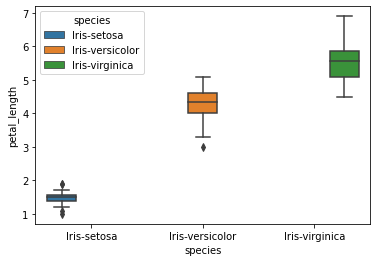

In [15]:
sns.boxplot(y=df['petal_length'],x=df['species'],hue='species',data=df)

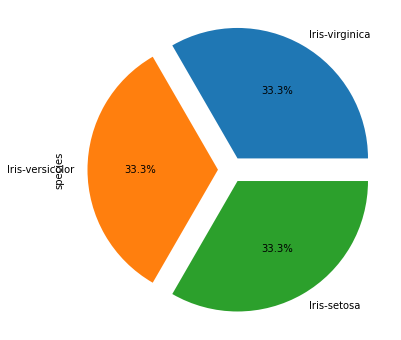

In [16]:
plt.subplots(1,1,figsize=(6,6))
df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%')
plt.show()

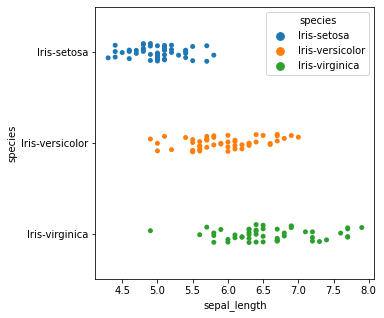

In [17]:
plt.subplots(figsize=(5,5))
sns.stripplot(x="sepal_length", y="species" , data=df, hue="species")
plt.show()

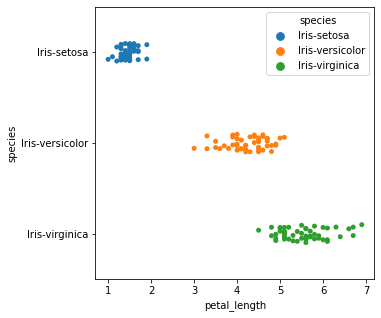

In [18]:
plt.subplots(figsize=(5,5))
sns.stripplot(x="petal_length", y="species" , data=df, hue="species")
plt.show()

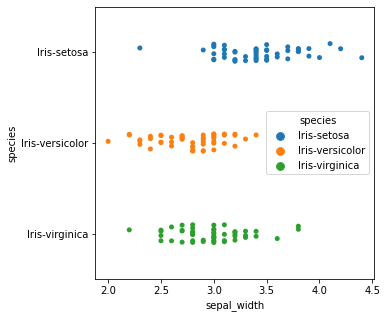

In [19]:
plt.subplots(figsize=(5,5))
sns.stripplot(x="sepal_width", y="species" , data=df, hue="species")
plt.show()

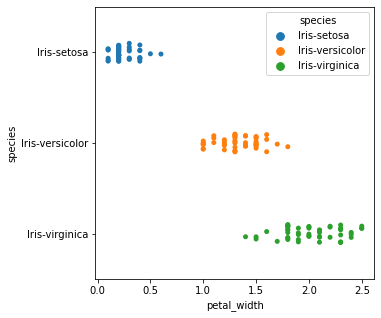

In [20]:
plt.subplots(figsize=(5,5))
sns.stripplot(x="petal_width", y="species" , data=df, hue="species")
plt.show()

## mahalnobis

In [21]:
from scipy.stats import chi2
data ={ 'X':[34,67,89,12,34,11,39],
        'Y':[23,100,200,233,123,34,45],
        'Z':[65,87,32,13,44,66,99],   
    }

df_new =pd.DataFrame(data,columns=['X','Y','Z'])
def mahalnobis(x=None, data=None, cov=None):
    a= x-np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    b=np.linalg.inv(cov)
    left=np.dot(a,b)
    m=np.dot(left,a.T)
    return m.diagonal()
df_new['mahalnobis'] = mahalnobis(x=df_new,data=df_new[['X','Y','Z']])
print(df_new.head())

    X    Y   Z  mahalnobis
0  34   23  65    2.578047
1  67  100  87    2.291698
2  89  200  32    4.098324
3  12  233  13    4.449750
4  34  123  44    0.325460


In [22]:
df_new['']=1-chi2.cdf(df_new['mahalnobis'],2)
print(df_new.head())

    X    Y   Z  mahalnobis          
0  34   23  65    2.578047  0.275540
1  67  100  87    2.291698  0.317954
2  89  200  32    4.098324  0.128843
3  12  233  13    4.449750  0.108081
4  34  123  44    0.325460  0.849820
